In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

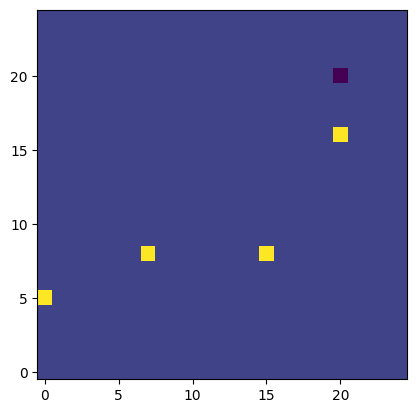

In [146]:
data = np.ones((25, 25)) * 5

# Assign 1 random point to be 10
goal = (20, 20)
data[goal[0], goal[1]] = 0
# Assign 4 random points to be -1
data[np.random.randint(0, 25, 4), np.random.randint(0, 25, 4)] = 25
plt.imshow(data, cmap='viridis', origin='lower')

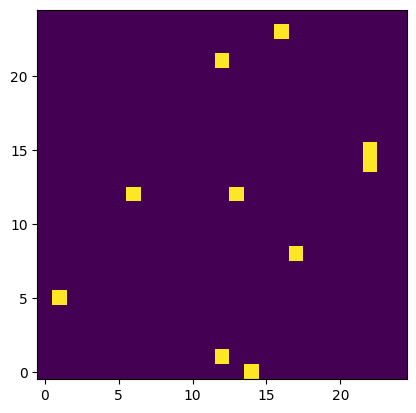

In [147]:
map = np.zeros((25, 25))
map[np.random.randint(0, 25, 10), np.random.randint(0, 25, 10)] = 1
plt.imshow(map, cmap='viridis', origin='lower')

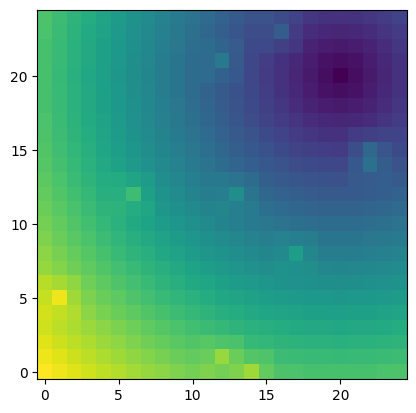

In [148]:
def get_potential(map, goal):
    # Convolve map
    kernel = np.array([[1, 1, 1], [1, 4, 1], [1, 1, 1]], dtype=np.float32)
    kernel /= np.sum(kernel)
    map = convolve2d(map, kernel, mode='same', boundary='fill', fillvalue=0)
    # map = convolve2d(map, kernel, mode='same', boundary='fill', fillvalue=0)
    
    potential = np.zeros_like(map)
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            distance = np.sqrt((i - goal[0])**2 + (j - goal[1])**2)
            potential[i, j] = distance + map[i, j] * 10
    return potential

potential = get_potential(map, goal)
plt.imshow(potential, cmap='viridis', origin='lower')

In [149]:
# Compute the gradient of the potential field
def get_action(pos, potential):
    neighbors = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            x = np.clip(pos[0] + i, 0, potential.shape[0] - 1)
            y = np.clip(pos[1] + j, 0, potential.shape[1] - 1)
            neighbors.append((x, y))
            
    # Return neighbor with lowest potential
    neighbors_potential = [potential[point[0], point[1]] for point in neighbors]
    min_index = np.argmin(neighbors_potential)
    return neighbors[min_index]

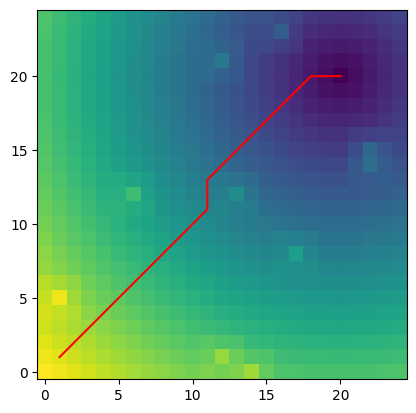

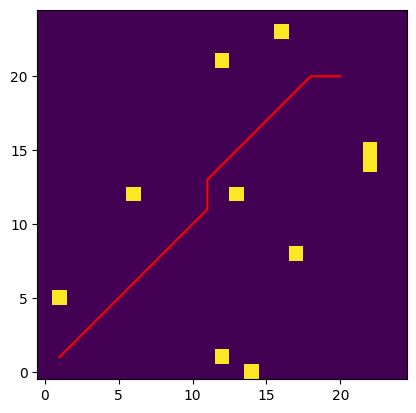

In [150]:
init_pos = (0, 0)
pos = init_pos

def find_path(pos, goal, potential):
    pos_h = []
    for i in range(100):
        pos = get_action(pos, potential)
        pos_h.append(pos)
        if pos == goal:
            break
    return pos_h

pos_h = []
for i in range(100):
    pos = get_action(pos, potential)
    pos_h.append(pos)
    if pos == goal:
        break
pos_h = np.array(pos_h)
plt.imshow(potential, cmap='viridis', origin='lower')
plt.plot(pos_h[:, 1], pos_h[:, 0], 'r')
plt.show()

plt.imshow(map, cmap='viridis', origin='lower')
plt.plot(pos_h[:, 1], pos_h[:, 0], 'r')
plt.show()